In [1]:
from dotenv import load_dotenv
load_dotenv()

True

# Langgraph 

## Cấu trúc

- **Node**: Bao gồm các hàm Python 
- **Edge**: Kết nối các Node
	- **Conditional Edge**: Nhiều Edge xuất phát từ 1 node, tùy thuộc vào 1 điều kiện cho trước
- **State**: State Schema, làm input cho các Node và Edge.
- **State Graph**: Cấu trúc Graph.



Để xây dựng LangGraph Workflow:

- Định nghĩa State
- State schema làm input schema cho tất cả các Node và Edge

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str
    key: str

Định nghĩa Node

Positional Argument đầu tiên là State được định nghĩa

State là TypedDict như schema ở trên. Mỗi node trả về một GraphState.\

Nếu trả về kết quả mới sẽ override các state value trước

Graph co thê được xây dựng bằng các component ở trên. 

`StateGraph` là class có thể dùng.

Đầu tiên, tạo 1 `StateGraph` với `State` class ở trên

Sau đó thêm các `Node` và `Edge`.

Sử dụng `START Node` là `Node` nhận input của người dùng để bắt đầu Graph; `END Node` để kết thúc

Compile Graph

Sau đó vẽ graph dưới dạng Mermaid Diagram


In [3]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
import secrets

def start(state: State) -> State:
    return state

def get_key(state: State) -> State:
    return State({
		"graph_info": state["graph_info"],"key": secrets.token_hex(10)
	})

graph = StateGraph(State)
# graph.add_node(START, start)
graph.add_node("start", start)
graph.add_node("get_key", get_key)    

graph.add_edge(START, "start")
graph.add_edge("start", "get_key")
graph.add_edge("get_key", END)

print(graph)

Compile graph


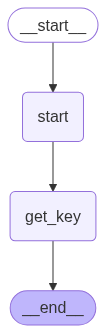

In [7]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display, Markdown

graph_builder = graph.compile()

# Display as Mermaid diagram directly in the notebook
mermaid_code = graph_builder.get_graph().draw_mermaid_png()
display(Image(mermaid_code))

Invoke graph bằng `graph.invoke()`

In [12]:
graph_builder.invoke(State({
	"graph_info": "graph",
 "key": ""
}))

{'graph_info': 'graph', 'key': '629d75b01dfcae290f16'}